# Demand Visualization Class

## Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Class implementation

In [247]:
class DemandVisualization():
    '''
    The class for energy demand visualization for given electrical data

    Parameter
    ---------
    energyDataFile: str
        Electrical demand data file path
    '''
    def __init__(self, energyDataFile: str='../raw_data/CAISOactualLoad.csv') -> None:
        assert isinstance(energyDataFile, str)

        self.demandData = pd.read_csv(energyDataFile)
        self.__energyDemand()

    def __energyDemand(self) -> pd.DataFrame:
        '''
        Calculate the demand with electrical data

        Returns
        -------
        zone	Year_Month	Year	Month	Day	Hour
        pandas.DataFrame
            | Date | Demand | zone | Year_Month | Year | Month | Day |
            |------|--------|------|------------|------|-------|-----|
        
            Date: datetime
            Demand: float
            zone: str
            Year_Month: str
            Year: int
            Month: int
            Day: int
        '''
        df = self.demandData.loc[self.demandData['zone'] == 'CA ISO']
        # Pre-process the data
        date_and_time = df['Date'].to_list()
        date = [d.split(' ') for d in date_and_time]
        for d in date:
            if d[2] == 'AM' and d[1] == '12:00:00':
                d[1] = '0:00:00'
            if d[2] == 'PM' and d[1] != '12:00:00':
                c = int(d[1].split(":")[0])
                d[1] = str(c + 12) + ":00:00"
        
        year_month = [d[0].split('/')[0] + '/' + d[0].split('/')[2] for d in date]
        year = [int(d[0].split('/')[2]) for d in date]
        month = [int(d[0].split('/')[0]) for d in date]
        day = [int(d[0].split('/')[1]) for d in date]
        hour = [int(d[1].split(':')[0]) for d in date]
        df['Year_Month'] = year_month
        df['Year'] = year
        df['Month'] = month
        df['Day'] = day
        df['Hour'] = hour
        self.__demandDF = df.rename(columns={'load': 'Demand'})
        

    def getEnergyDemand(self) -> pd.DataFrame:
        return self.__demandDF
    
    def plot_demand_for_one_year(self, year, file_name=None, save=False):
        '''
        Plot demand of the given year
        Args:
            year (int): given year
        Returns:
            pandas.DataFrame
        '''
        if save:
            assert file_name != None, f'Need file name for saving.'
        
        # Get the data of given year
        df_year_load = self.__demandDF.copy()
        df_year_load = df_year_load.loc[df_year_load['Year'] == year][['Date', 'Year_Month', 'Demand']]
        
        # Plot
        plt.figure()
        df_year_load.plot(x='Year_Month', y='Demand')
        plt.xlabel('Time (Month/Year)')
        plt.ylabel('Demand (MW)')
        plt.title(f'California demand in {year}')
        
        # Save the figure
        if save:
            plt.savefig(file_name)
            print(f'Save the figure to /{file_name}')
        
        return df_year_load[['Date', 'Demand']]
        
    def plot_demand_by_month(self, year, months, file_name=None, save=False):
        '''
        Plot demand of the given year
        Args:
            year (int): given year
            months (list(int)): months to plot
        Returns:
            pandas.DataFrame
        '''
        if save:
            assert file_name != None, f'Need file name for saving.'
        
        # Get the data of given year
        df_year_load = self.__demandDF.copy()
        df_year_load = df_year_load.loc[df_year_load['Year'] == year]
        
        # Get the sum of GHI in a day for every month
        demand_sum = df_year_load.groupby(["Month", "Day"]).sum()
        demand_sum = demand_sum.reset_index().pivot(index="Day",columns="Month",values="Demand")
        
        # Compare Highest three and lowest three months
        plt.figure()
        demand_sum[months].plot(style='-')
        plt.title(f'Demand by month in California ({year})')
        plt.xlabel('Day')
        plt.ylabel('Demand (MWh))')
        
        # Save the figure
        if save:
            plt.savefig(file_name)
            print(f'Save the figure to /{file_name}')
            
        return demand_sum[months]
    
    def plot_demand_month_hour_heatmap(self, year, file_name=None, save=False):
        '''
        Plot demand of the given year
        Args:
            year (int): given year
        Returns:
            pandas.DataFrame
        '''
        if save:
            assert file_name != None, f'Need file name for saving.'
        
        # Get the data of given year
        df_year_load = self.__demandDF.copy()
        df_year_load = df_year_load.loc[df_year_load['Year'] == year]
        
        # Get the sum of GHI in a day for every month
        demand_sum = df_year_load.groupby(["Month", "Hour"]).sum()
        demand_sum = demand_sum.reset_index().pivot(index="Month",columns="Hour",values="Demand")
        
        # Plot the Heat Map
        plt.imshow(demand_sum)
        plt.xlabel("Hour")
        plt.ylabel("Month")
        plt.title(f"{year} Mean Demand in California (MWh)")
        plt.colorbar()
        
        # Save the figure
        if save:
            plt.savefig(file_name)
            print(f'Save the figure to /{file_name}')
        return demand_sum
    
    def plot_demand_variance(self, year, file_name=None, save=False):
        '''
        Plot demand of the given year
        Args:
            year (int): given year
        Returns:
            pandas.DataFrame
        '''
        if save:
            assert file_name != None, f'Need file name for saving.'
        
        # Get the data of given year
        df_year_load = self.__demandDF.copy()
        df_year_load = df_year_load.loc[df_year_load['Year'] == year]
        
        # Get the sum of GHI in a day for every month
        demand_sum = df_year_load.groupby(["Month", "Day"]).sum()
        demand_sum = demand_sum.reset_index().pivot(index="Day",columns="Month",values="Demand")
        
        # Get the boxplot
        plt.figure()
        demand_sum.boxplot(column=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
        plt.title(f'Variation per month in demand in California ({year})')
        plt.xlabel('Month')
        plt.ylabel('Demand (MWh)')
        
        # Save the figure
        if save:
            plt.savefig(file_name)
            print(f'Save the figure to /{file_name}')
        return demand_sum
        

In [248]:
path = 'raw_data/CAISOactualLoad.csv'
d = DemandVisualization(path)

/var/folders/wg/y5qyxqr51mq214bkr4zp20940000gn/T/ipykernel_65345/168306529.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Month'] = year_month
/var/folders/wg/y5qyxqr51mq214bkr4zp20940000gn/T/ipykernel_65345/168306529.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = year
/var/folders/wg/y5qyxqr51mq214bkr4zp20940000gn/T/ipykernel_65345/168306529.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [214]:
d.demandData

,Date,load,zone
0,1/1/2018 12:00:00 AM,2662.0,AZPS
1,1/1/2018 12:00:00 AM,21202.0,CA ISO
2,1/1/2018 12:00:00 AM,3519.0,NEVP
3,1/1/2018 12:00:00 AM,4769.0,PACE
4,1/1/2018 12:00:00 AM,2233.0,PACW
...,...,...,...
390290,12/31/2020 11:00:00 PM,9845.0,SCE
390291,12/31/2020 11:00:00 PM,978.0,SCL
390292,12/31/2020 11:00:00 PM,2125.0,SDGE
390293,12/31/2020 11:00:00 PM,2976.0,SRP


In [215]:
d.getEnergyDemand()

,Date,Demand,zone,Year_Month,Year,Month,Day,Hour
1,1/1/2018 12:00:00 AM,21202.0,CA ISO,1/2018,2018,1,1,0
12,1/1/2018 1:00:00 AM,20559.0,CA ISO,1/2018,2018,1,1,1
23,1/1/2018 2:00:00 AM,20017.0,CA ISO,1/2018,2018,1,1,2
34,1/1/2018 3:00:00 AM,19629.0,CA ISO,1/2018,2018,1,1,3
45,1/1/2018 4:00:00 AM,19613.0,CA ISO,1/2018,2018,1,1,4
...,...,...,...,...,...,...,...,...
390213,12/31/2020 7:00:00 PM,25789.0,CA ISO,12/2020,2020,12,31,19
390230,12/31/2020 8:00:00 PM,24974.0,CA ISO,12/2020,2020,12,31,20
390247,12/31/2020 9:00:00 PM,24128.0,CA ISO,12/2020,2020,12,31,21
390264,12/31/2020 10:00:00 PM,23102.0,CA ISO,12/2020,2020,12,31,22


<Figure size 640x480 with 0 Axes>

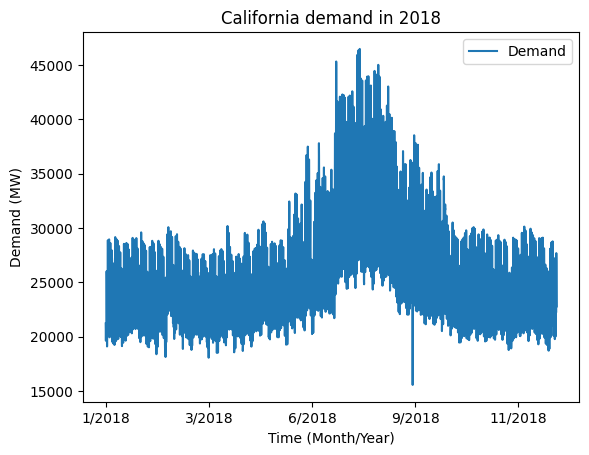

In [216]:
df_plot_demand_for_one_year = d.plot_demand_for_one_year(2018, file_name=None, save=False)

In [217]:
df_plot_demand_for_one_year

,Date,Demand
1,1/1/2018 12:00:00 AM,21202.0
12,1/1/2018 1:00:00 AM,20559.0
23,1/1/2018 2:00:00 AM,20017.0
34,1/1/2018 3:00:00 AM,19629.0
45,1/1/2018 4:00:00 AM,19613.0
...,...,...
116084,12/31/2018 7:00:00 PM,26814.0
116098,12/31/2018 8:00:00 PM,25905.0
116112,12/31/2018 9:00:00 PM,24935.0
116126,12/31/2018 10:00:00 PM,23804.0


<Figure size 640x480 with 0 Axes>

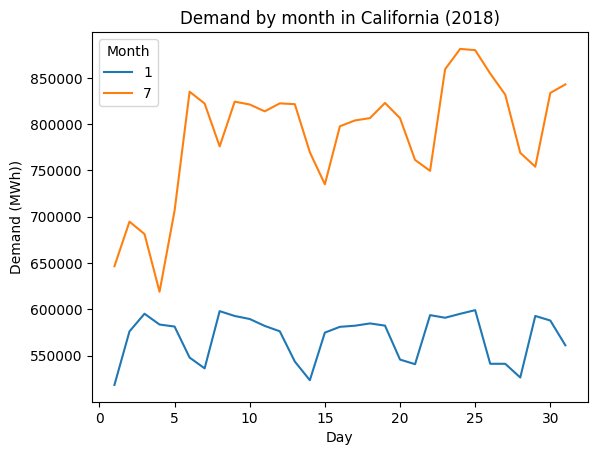

In [218]:
months = [1, 7]
df_plot_demand_by_month = d.plot_demand_by_month(2018, months)

In [219]:
df_plot_demand_by_month

Month,1,7
Day,,
1,518503.0,646657.0
2,576266.0,694752.0
3,595332.0,681381.0
4,583683.0,619096.0
5,581511.0,706501.0
6,548030.0,835014.0
7,536375.0,822258.0
8,598134.0,775988.0
9,592934.0,824279.0


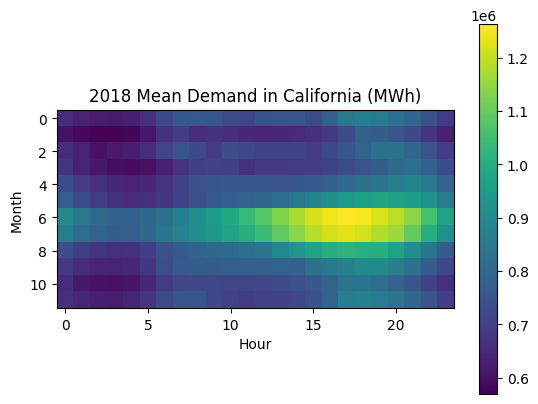

In [242]:
df_demand_month_hour_heatmap = d.plot_demand_month_hour_heatmap(2018, file_name=None, save=False)

In [243]:
df_demand_month_hour_heatmap

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,657073.0,636725.0,623776.0,619879.0,631048.0,664529.0,723526.0,759200.0,762389.0,757922.0,...,752573.0,731569.0,780855.0,847242.0,868476.0,853277.0,831071.0,794612.0,742457.0,691576.0
2,602529.0,582881.0,571525.0,569215.0,580629.0,614896.0,669872.0,693871.0,660111.0,671241.0,...,654046.0,664267.0,683031.0,728358.0,779202.0,772915.0,755361.0,723751.0,676613.0,632993.0
3,661052.0,637821.0,604121.0,618986.0,627789.0,658118.0,714370.0,749379.0,722687.0,692665.0,...,707558.0,689915.0,725803.0,752004.0,793077.0,826572.0,828092.0,797917.0,747901.0,696126.0
4,674688.0,638893.0,614621.0,598696.0,592982.0,601297.0,632506.0,676693.0,700018.0,703664.0,...,688576.0,696119.0,709236.0,728210.0,749802.0,773131.0,807308.0,820537.0,785260.0,729281.0
5,730871.0,690872.0,663343.0,645732.0,639098.0,647998.0,676438.0,712191.0,743732.0,754527.0,...,759243.0,769062.0,784974.0,807015.0,827399.0,842070.0,859702.0,880226.0,850717.0,790417.0
6,778111.0,727228.0,691994.0,668014.0,656232.0,661416.0,682422.0,709155.0,740954.0,762424.0,...,847845.0,878676.0,911626.0,941750.0,963932.0,973115.0,963149.0,955137.0,922858.0,852684.0
7,895562.0,843953.0,807872.0,785686.0,783191.0,801551.0,827998.0,866489.0,906463.0,946958.0,...,1175878.0,1217324.0,1247760.0,1262854.0,1255146.0,1222320.0,1192038.0,1143019.0,1057094.0,967586.0
8,867413.0,820445.0,789359.0,773644.0,776319.0,804419.0,842209.0,877731.0,910087.0,940327.0,...,1142510.0,1185880.0,1218744.0,1230742.0,1215690.0,1183066.0,1160318.0,1097483.0,1006648.0,923746.0
9,732315.0,697886.0,673929.0,662529.0,668194.0,695634.0,741094.0,765540.0,783406.0,797862.0,...,932743.0,974179.0,1005849.0,1020132.0,1009128.0,1003138.0,972070.0,913001.0,840711.0,774522.0


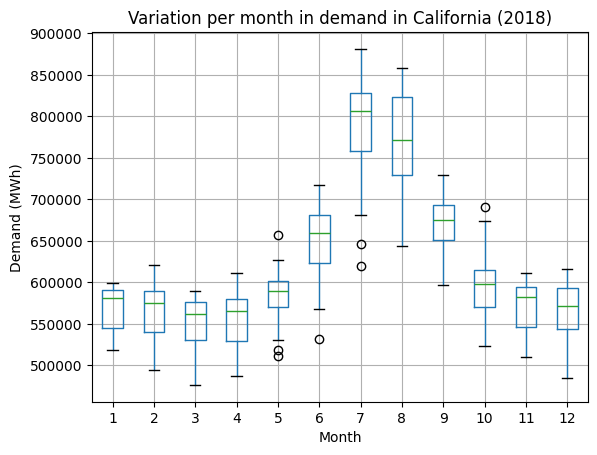

In [249]:
df_demand_variance = d.plot_demand_variance(2018, file_name=None, save=False)

In [250]:
df_demand_variance

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
1,518503.0,583065.0,589278.0,487232.0,584049.0,598345.0,646657.0,847840.0,649793.0,690715.0,603289.0,551248.0
2,576266.0,584708.0,583884.0,558731.0,586404.0,608250.0,694752.0,831685.0,628589.0,673758.0,611799.0,537163.0
3,595332.0,528907.0,536653.0,567100.0,578934.0,621709.0,681381.0,829315.0,652278.0,656131.0,563243.0,590519.0
4,583683.0,516738.0,514577.0,579709.0,611951.0,667902.0,619096.0,771652.0,713643.0,634245.0,544407.0,604699.0
5,581511.0,561771.0,570027.0,580733.0,579949.0,635302.0,706501.0,734950.0,714518.0,617996.0,609571.0,616341.0
6,548030.0,565707.0,567537.0,578400.0,548241.0,626307.0,835014.0,825291.0,695140.0,563063.0,583111.0,613236.0
7,536375.0,582697.0,569524.0,530126.0,606581.0,626514.0,822258.0,839200.0,728903.0,544832.0,586078.0,589878.0
8,598134.0,581514.0,541444.0,507141.0,622574.0,644439.0,775988.0,837254.0,709491.0,614749.0,579264.0,548632.0
9,592934.0,570955.0,560853.0,598146.0,626754.0,601454.0,824279.0,858680.0,675659.0,615535.0,577965.0,542552.0
